In [1]:
import numpy as np
from numpy import pi as π
from numpy.linalg import norm

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
plt.rcParams['font.size'] = 18

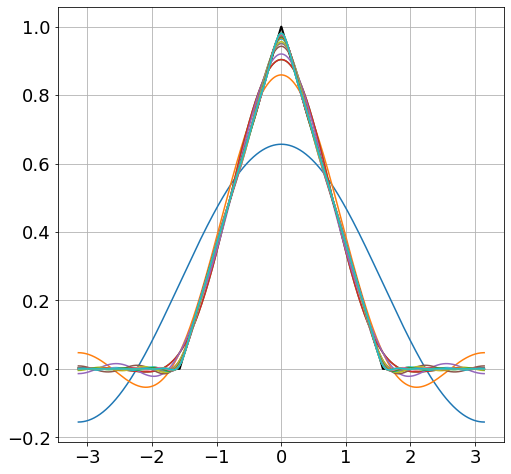

In [2]:
# Define domain
dx = 0.001
L = π
x = L * np.arange(-1+dx, 1+dx, dx)
n = len(x)
nquart = n // 4

# Define hat function
f = np.zeros_like(x)
f[nquart: 2*nquart] = (4/n) * np.arange(1, nquart+1)
f[2*nquart: 3*nquart] = np.ones(nquart) - (4/n) * np.arange(0, nquart)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x, f, '-', color='black', linewidth=2)
ax.set_prop_cycle(
    color=get_cmap('tab10').colors
)

# Compute Fourier series
A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0 / 2

A = np.zeros(20)
B = np.zeros(20)
for k in range(20):
    A[k] = np.sum(f * np.cos(π * (k+1) * x / L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(π * (k+1) * x / L)) * dx
    fFS = fFS + A[k] * np.cos((k+1) * π * x / L) + B[k] * np.sin((k+1) * π * x / L)
    ax.plot(x, fFS, '-')
ax.grid(True)

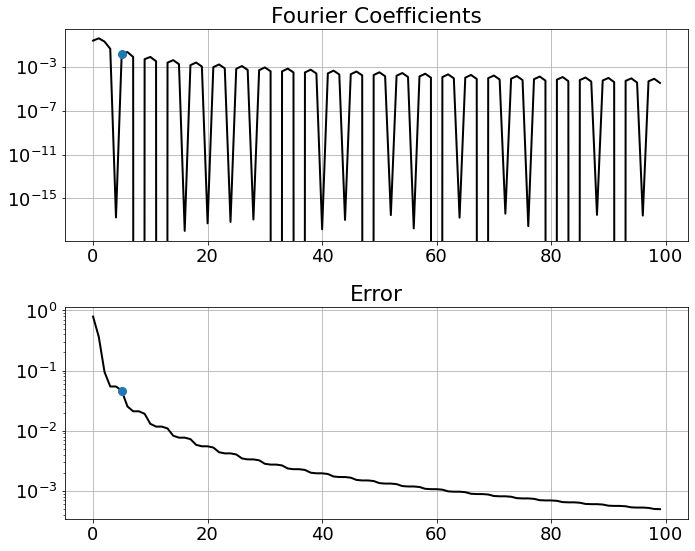

In [3]:
## Plot amplitudes

fFS = (A0 / 2) * np.ones_like(f)
kmax = 100
A = np.zeros(kmax)
B = np.zeros(kmax)
ERR = np.zeros(kmax)

A[0] = A0 / 2
ERR[0] = np.linalg.norm(f - fFS) / np.linalg.norm(f)

for k in range(1,kmax):
    A[k] = np.sum(f * np.cos(π*k*x/L)) * dx
    B[k] = np.sum(f * np.sin(π*k*x/L)) * dx
    fFS = fFS + A[k] * np.cos(k*π*x/L) + B[k] * np.sin(k*π*x/L)
    ERR[k] = norm(f - fFS) / norm(f)
    
thresh = np.median(ERR) * np.sqrt(kmax) * (4 / np.sqrt(3))
r = np.max(np.where(ERR > thresh))

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].semilogy(np.arange(kmax), A, color='black', linewidth=2)
axs[0].semilogy(r, A[r], 'o',  markersize=8)
axs[0].set_title('Fourier Coefficients')
axs[0].grid(True)

axs[1].semilogy(np.arange(kmax), ERR, color='black', linewidth=2)
axs[1].semilogy(r, ERR[r], 'o', markersize=8)
axs[1].set_title('Error')
axs[1].grid(True)
plt.tight_layout()